# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [3]:
checkpoints = r'C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [5]:
train_dir = r'C:\Users\USAMA\plantvillage dataset\basedir\train'
validation_dir = r'C:\Users\USAMA\plantvillage dataset\basedir\validation'
test_dir = r'C:\Users\USAMA\plantvillage dataset\basedir\test'

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

D:\anconda\envs\MLLab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [15]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [17]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

D:\anconda\envs\MLLab\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.3679 - loss: 1.3901
Epoch 1: val_loss improved from inf to 0.72901, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0001-loss0.73.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - acc: 0.3701 - loss: 1.3858 - val_acc: 0.6786 - val_loss: 0.7290
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6914 - loss: 0.6853
Epoch 2: val_loss improved from 0.72901 to 0.48042, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0002-loss0.48.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.6916 - loss: 0.6846 - val_acc: 0.7698 - val_loss: 0.4804
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7639 - loss: 0.5281
Epoch 3: val_loss improved from 0.48042 to 0.41626, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0003-loss0.42.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.7640 - loss: 0.5280 - val_acc: 0.8175 - val_loss: 0.4163
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8113 - loss: 0.4364
Epoch 4: val_loss improved from 0.41626 to 0.36583, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0004-loss0.37.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - acc: 0.8112 - loss: 0.4364 - val_acc: 0.8254 - val_loss: 0.3658
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8392 - loss: 0.3945
Epoch 5: val_loss improved from 0.36583 to 0.36464, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0005-loss0.36.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - acc: 0.8391 - loss: 0.3944 - val_acc: 0.8214 - val_loss: 0.3646
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8387 - loss: 0.3621
Epoch 6: val_loss did not improve from 0.36464
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - acc: 0.8388 - loss: 0.3620 - val_acc: 0.6349 - val_loss: 1.0241
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8406 - loss: 0.3997
Epoch 7: val_loss did not improve from 0.36464
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - acc: 0.8409 - loss: 0.3987 - val_acc: 0.7103 - val_loss: 0.7028
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8678 - loss: 0.3005
Epoch 8: val_loss improved from 0.36464 to 0.28798, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0008-loss0.29.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - acc: 0.8678 - loss: 0.3003 - val_acc: 0.8452 - val_loss: 0.2880
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8661 - loss: 0.2804
Epoch 9: val_loss improved from 0.28798 to 0.27966, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0009-loss0.28.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.8660 - loss: 0.2806 - val_acc: 0.8413 - val_loss: 0.2797
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8940 - loss: 0.2460
Epoch 10: val_loss did not improve from 0.27966
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - acc: 0.8939 - loss: 0.2462 - val_acc: 0.8452 - val_loss: 0.3341


In [19]:
model_history.history

{'acc': [0.4793750047683716,
  0.699999988079071,
  0.7662500143051147,
  0.8075000047683716,
  0.831250011920929,
  0.8424999713897705,
  0.8550000190734863,
  0.8706250190734863,
  0.8643749952316284,
  0.8899999856948853],
 'loss': [1.1724300384521484,
  0.6498966813087463,
  0.5237047672271729,
  0.43296727538108826,
  0.3879871070384979,
  0.35875359177589417,
  0.3488399088382721,
  0.2874012887477875,
  0.2907230854034424,
  0.257020503282547],
 'val_acc': [0.6785714030265808,
  0.7698412537574768,
  0.817460298538208,
  0.8253968358039856,
  0.8214285969734192,
  0.6349206566810608,
  0.7103174328804016,
  0.8452380895614624,
  0.841269850730896,
  0.8452380895614624],
 'val_loss': [0.729010283946991,
  0.48042479157447815,
  0.41625890135765076,
  0.3658274710178375,
  0.36463746428489685,
  1.0240726470947266,
  0.7027574777603149,
  0.28797686100006104,
  0.2796550691127777,
  0.3341200053691864]}

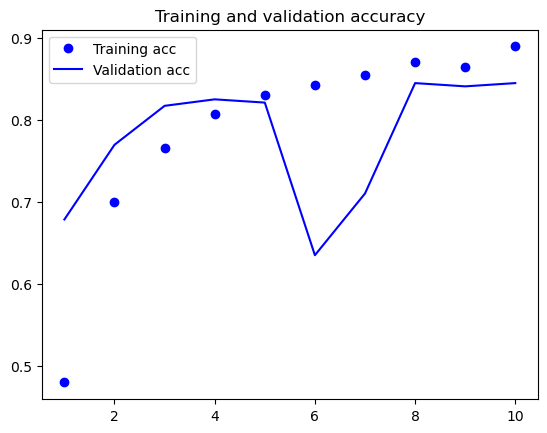

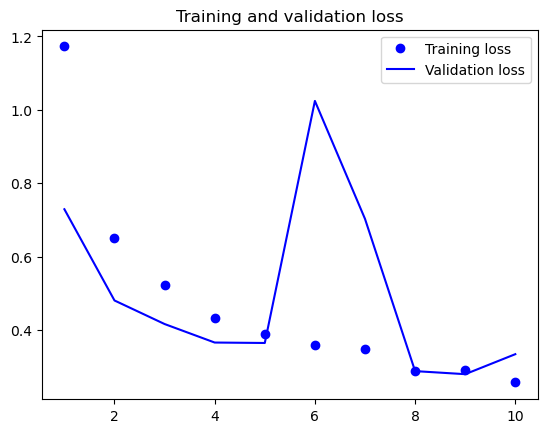

<Figure size 640x480 with 0 Axes>

In [21]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\USAMA\plantvillage dataset\basedir\model save\model_Accuracy.png')

In [23]:
model.save(r'C:\Users\USAMA\plantvillage dataset\basedir\model save\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 840ms/step


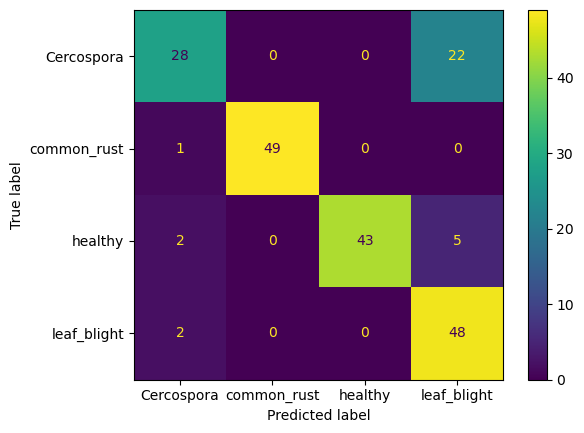

In [25]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [27]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.85      0.56      0.67        50
 common_rust       1.00      0.98      0.99        50
     healthy       1.00      0.86      0.92        50
 leaf_blight       0.64      0.96      0.77        50

    accuracy                           0.84       200
   macro avg       0.87      0.84      0.84       200
weighted avg       0.87      0.84      0.84       200

